In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Model-specific imports:
from sklearn.datasets import make_regression
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
inputData = pd.read_excel(r'/Users/harshilkalsi/Downloads/Volumetric_features.xlsx', engine='openpyxl').sample(frac = 1)

inputData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
900,901,16258.0,843.1,14313.9,47783.8,6036.5,2484.8,3637.1,1711.1,1887.5,...,2.218,2.329,3.324,2.509,2.652,2.17165,938845,1401946.040,79,1
2805,2806,8432.9,451.3,12204.8,45002.2,6741.8,3021.8,3777.3,1540.4,1293.0,...,2.463,3.268,3.537,2.039,2.831,2.37654,1031139,1247065.659,54,7
3848,3849,10443.3,258.5,16448.4,53410.1,6823.7,3741.8,4488.5,2261.4,987.3,...,2.572,2.707,3.575,2.358,2.901,2.48700,1099483,1529624.189,57,9
3400,3401,3619.9,212.5,17938.1,54703.7,9187.6,3212.7,5154.8,2486.0,859.0,...,2.606,2.433,4.007,2.361,2.928,2.52954,1183059,1548330.643,19,8
2928,2929,4441.7,150.2,17794.6,56271.0,8854.9,3377.8,4638.8,1930.8,813.1,...,2.331,2.650,3.917,2.328,2.826,2.39618,1126132,1497811.751,55,7


In [4]:
# # select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# instantiate a linear regression model using sklearn:
reg = ensemble.GradientBoostingRegressor(random_state=0)

# fit the model to the training data
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [6]:
# check the model's performance on unseen, test data
predictions = reg.predict(X_test)

# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean absolute error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r square value: 0.8808992042649634
mean absolute error (years): 5.439312698604639
mean square error: 51.63525408407929
root mean absolute error (years): 7.185767466602249


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

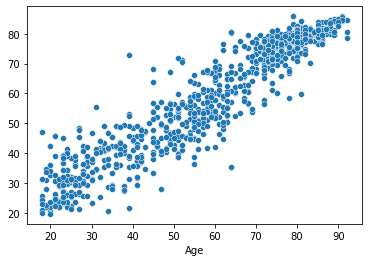

In [7]:
# plotting
import seaborn as sns
sns.scatterplot(y_test, predictions)

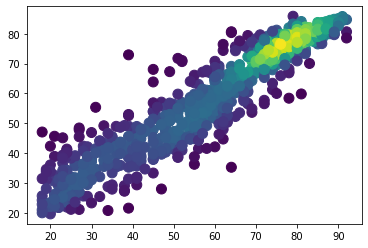

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([y_test,predictions])
z = gaussian_kde(xy)(xy)

fig,ax = plt.subplots()
ax.scatter(y_test, predictions, c=z, s=100)
plt.show()